In [1]:
# coding: utf-8
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from rnnlm import Rnnlm

In [2]:
# 设定超参数
batch_size = 20
wordvec_size = 100
hidden_size = 100  # RNN的隐藏状态向量的元素个数
time_size = 35  # RNN的展开大小
lr = 20.0
max_epoch = 4
max_grad = 0.25

In [3]:
# 读入训练数据
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

Done


In [4]:
# 生成模型
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

| epoch 1 |  iter 1 / 1327 | time 0[s] | perplexity 10000.15
| epoch 1 |  iter 21 / 1327 | time 7[s] | perplexity 3010.63
| epoch 1 |  iter 41 / 1327 | time 13[s] | perplexity 1262.50
| epoch 1 |  iter 61 / 1327 | time 20[s] | perplexity 950.21
| epoch 1 |  iter 81 / 1327 | time 27[s] | perplexity 784.27
| epoch 1 |  iter 101 / 1327 | time 34[s] | perplexity 659.12
| epoch 1 |  iter 121 / 1327 | time 41[s] | perplexity 655.41
| epoch 1 |  iter 141 / 1327 | time 48[s] | perplexity 598.14
| epoch 1 |  iter 161 / 1327 | time 55[s] | perplexity 576.66
| epoch 1 |  iter 181 / 1327 | time 62[s] | perplexity 575.63
| epoch 1 |  iter 201 / 1327 | time 68[s] | perplexity 487.78
| epoch 1 |  iter 221 / 1327 | time 75[s] | perplexity 505.08
| epoch 1 |  iter 241 / 1327 | time 81[s] | perplexity 447.01
| epoch 1 |  iter 261 / 1327 | time 87[s] | perplexity 461.31
| epoch 1 |  iter 281 / 1327 | time 94[s] | perplexity 452.67
| epoch 1 |  iter 301 / 1327 | time 100[s] | perplexity 393.08
| epoch 1 |

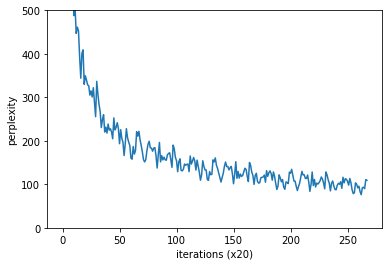

In [5]:
# 应用梯度裁剪进行学习
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad,
            eval_interval=20)
trainer.plot(ylim=(0, 500))